### IMPORT ALL NECESSARY DEPENDENCIES:

In [43]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [44]:
pca=pd.read_csv('/home/vboxuser/Downloads/svm_prob_best.csv')
logits=pd.read_csv('/home/vboxuser/Downloads/logits_train_seq_modelling(updated).csv')

In [45]:
pca_test=pd.read_csv('/home/vboxuser/Downloads/svm_prob_tr_best.csv')
logits_test=pd.read_csv('/home/vboxuser/Downloads/logits_test_seq_modelling.csv')

### TEST DATA PRE-PROCESSING

In [46]:
pca_test.head(5)

,Unnamed: 0,prob_hc,prob_dp,speaker,class
0,0,0.912154,0.087846,600,0
1,1,0.947746,0.052254,602,1
2,2,0.536509,0.463491,604,1
3,3,0.952286,0.047714,605,0
4,4,0.230067,0.769933,606,0


In [47]:
logits_test.head(5)

,Unnamed: 0,logit1,logit2,speaker,class
0,0,2.305435,-2.282720,600_AUDIO,0
1,1,3.202301,-3.164946,602_AUDIO,1
2,2,3.224495,-3.224386,604_AUDIO,1
3,3,3.340670,-3.335116,605_AUDIO,0
4,4,3.919317,-3.926629,606_AUDIO,0


In [48]:
logits_test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [49]:
for i in range (0,len(logits_test)):
    logits_test['speaker'][i]=logits_test['speaker'][i][0:3]

/tmp/ipykernel_33077/1777725059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logits_test['speaker'][i]=logits_test['speaker'][i][0:3]


In [50]:
logits_test.head(5)

,logit1,logit2,speaker,class
0,2.305435,-2.282720,600,0
1,3.202301,-3.164946,602,1
2,3.224495,-3.224386,604,1
3,3.340670,-3.335116,605,0
4,3.919317,-3.926629,606,0


In [51]:
logits_test['speaker']=logits_test['speaker'].astype(int)

In [52]:
data_t=pd.merge(pca_test,logits_test,on='speaker',how='inner')
data_t.head(5)

,Unnamed: 0,prob_hc,prob_dp,speaker,class_x,logit1,logit2,class_y
0,0,0.912154,0.087846,600,0,2.305435,-2.282720,0
1,1,0.947746,0.052254,602,1,3.202301,-3.164946,1
2,2,0.536509,0.463491,604,1,3.224495,-3.224386,1
3,3,0.952286,0.047714,605,0,3.340670,-3.335116,0
4,4,0.230067,0.769933,606,0,3.919317,-3.926629,0


In [53]:
data_t.drop(['Unnamed: 0','class_x'],axis=1,inplace=True)
data_t.head(5)

,prob_hc,prob_dp,speaker,logit1,logit2,class_y
0,0.912154,0.087846,600,2.305435,-2.282720,0
1,0.947746,0.052254,602,3.202301,-3.164946,1
2,0.536509,0.463491,604,3.224495,-3.224386,1
3,0.952286,0.047714,605,3.340670,-3.335116,0
4,0.230067,0.769933,606,3.919317,-3.926629,0


In [54]:
X_test=data_t.drop(['class_y'],axis=1)
y_test=data_t['class_y']

### TRAIN DATA PRE-PROCESSING

In [55]:
pca

,Unnamed: 0,prob_hc,prob_dp,speaker,class
0,0,0.128955,0.871045,426,1
1,1,0.129037,0.870963,354,1
2,2,0.129058,0.870942,338,1
3,3,0.128991,0.871009,376,1
4,4,0.128976,0.871024,367,1
...,...,...,...,...,...
247,247,0.977861,0.022139,695,0
248,248,0.938577,0.061423,697,0
249,249,0.938568,0.061432,702,0
250,250,0.938607,0.061393,703,0


In [56]:
logits.drop(['Unnamed: 0.1'],axis=1,inplace=True)

In [57]:
for i in range (0,len(logits)):
    logits['subject'][i]=logits['subject'][i][0:3]

/tmp/ipykernel_33077/2946883133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logits['subject'][i]=logits['subject'][i][0:3]


In [58]:
logits.rename(columns={'subject':'speaker'},inplace=True)

In [59]:
logits['speaker']=logits['speaker'].astype(int)

In [60]:
logits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  252 non-null    int64  
 1   logit1      252 non-null    float64
 2   logit2      252 non-null    float64
 3   speaker     252 non-null    int64  
 4   class       252 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 10.0 KB


In [61]:
#logits[logits['subject']=='364']
print(len(logits))
print(len(pca))

252
252


In [62]:
data=pd.merge(pca,logits,on='speaker',how='inner')


In [63]:
data.drop(['Unnamed: 0_x','Unnamed: 0_y','class_x'],axis=1,inplace=True)
data

,prob_hc,prob_dp,speaker,logit1,logit2,class_y
0,0.128955,0.871045,426,-3.410279,3.106926,1
1,0.128955,0.871045,426,-3.410279,3.106926,1
2,0.128955,0.871045,426,-3.410279,3.106926,1
3,0.128955,0.871045,426,-3.410279,3.106926,1
4,0.128955,0.871045,426,-3.410279,3.106926,1
...,...,...,...,...,...,...
651,0.977861,0.022139,695,3.059203,-3.044203,0
652,0.938577,0.061423,697,3.006278,-2.988242,0
653,0.938568,0.061432,702,3.176163,-3.142777,0
654,0.938607,0.061393,703,2.618396,-2.599412,0


### RANDOM FOREST CLASSIFIER:

In [64]:
RF_model=RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=13)

In [65]:
X=data.drop(['class_y'],axis=1)
y=data['class_y']

In [66]:
#for resampled data:
RF_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', random_state=13)

In [67]:
#predicting on test data:
Y_predict_RF=RF_model.predict(X_test)

In [68]:
#viewing accuracy score
print("The RF_model accuracy is given as : ",metrics.accuracy_score(y_test,Y_predict_RF))

The RF_model accuracy is given as :  0.7321428571428571


In [69]:
print(classification_report(y_test,Y_predict_RF))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        39
           1       1.00      0.12      0.21        17

    accuracy                           0.73        56
   macro avg       0.86      0.56      0.52        56
weighted avg       0.81      0.73      0.65        56



### DECISION TREES:

In [70]:
DF_model=DecisionTreeClassifier(max_depth=7,random_state=42,class_weight='balanced')

In [71]:
DF_model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=42)

In [72]:
Y_predict_DF=DF_model.predict(X_test)

In [73]:
print("The DF_model accuracy is given as : ",metrics.accuracy_score(y_test,Y_predict_DF))

The DF_model accuracy is given as :  0.7142857142857143


In [74]:
print(classification_report(y_test,Y_predict_DF))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        39
           1       1.00      0.06      0.11        17

    accuracy                           0.71        56
   macro avg       0.85      0.53      0.47        56
weighted avg       0.80      0.71      0.61        56



### SUPPORT VECTOR MACHINE

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid= {'C':[0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001],
             'kernel':['rbf']
            }

grid= GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3)

#grid.fit(Xp,Y)
grid.fit(X,y)

#finding the best parameters:
print(grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.809 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.809 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.809 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.809 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.803 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [76]:
SVM_model = SVC(kernel='rbf',C=10, gamma=0.01, class_weight='balanced',random_state=5,probability=True)

In [77]:
SVM_model.fit(X,y)

SVC(C=10, class_weight='balanced', gamma=0.01, probability=True, random_state=5)

In [78]:
Y_predict_SVM=SVM_model.predict(X_test)

In [79]:
Y_predict_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
prob=SVM_model.predict_proba(X_test)
prob

array([[0.97018401, 0.02981599],
       [0.97949846, 0.02050154],
       [0.98329861, 0.01670139],
       [0.98438395, 0.01561605],
       [0.98287206, 0.01712794],
       [0.98482233, 0.01517767],
       [0.98168815, 0.01831185],
       [0.95811074, 0.04188926],
       [0.93626933, 0.06373067],
       [0.93026903, 0.06973097],
       [0.92775357, 0.07224643],
       [0.93017847, 0.06982153],
       [0.93931612, 0.06068388],
       [0.71041701, 0.28958299],
       [0.95951413, 0.04048587],
       [0.9668414 , 0.0331586 ],
       [0.979225  , 0.020775  ],
       [0.93717228, 0.06282772],
       [0.96402471, 0.03597529],
       [0.94902357, 0.05097643],
       [0.86282716, 0.13717284],
       [0.78938679, 0.21061321],
       [0.02682488, 0.97317512],
       [0.53327618, 0.46672382],
       [0.69714853, 0.30285147],
       [0.79854807, 0.20145193],
       [0.89429147, 0.10570853],
       [0.92910411, 0.07089589],
       [0.87772847, 0.12227153],
       [0.98544828, 0.01455172],
       [0.

In [81]:
print("The SVM_accuracy is given as : ",metrics.accuracy_score(y_test,Y_predict_SVM))

The SVM_accuracy is given as :  0.6964285714285714


In [82]:
print(classification_report(y_test,Y_predict_SVM))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        39
           1       0.50      0.18      0.26        17

    accuracy                           0.70        56
   macro avg       0.61      0.55      0.53        56
weighted avg       0.65      0.70      0.64        56



In [83]:
df=pd.DataFrame(data_t['speaker'])
df['true_label']=y_test
df['predicted_label']=Y_predict_RF
df.head()

,speaker,true_label,predicted_label
0,600,0,0
1,602,1,0
2,604,1,0
3,605,0,0
4,606,0,0


In [85]:
info=pd.read_csv('/home/vboxuser/Downloads/test_split.csv')
info.head()

,Participant_ID,Gender,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity,predict,percentage,persad,predict_sad,predict_m_45
0,600,female,0,5,0,23.0,0,22.222222,22.222222,0,0
1,602,female,1,13,1,67.0,0,28.571429,17.857143,0,0
2,604,male,1,12,0,30.0,1,40.000000,40.000000,1,0
3,605,male,0,2,0,23.0,0,8.695652,8.695652,0,0
4,606,female,0,5,0,46.0,0,0.000000,0.000000,0,0


In [88]:
misclassified=df[df['true_label']!=df['predicted_label']]
print(len(misclassified))
misclassified

15


,speaker,true_label,predicted_label
1,602,1,0
2,604,1,0
13,624,1,0
20,636,1,0
21,637,1,0
23,640,1,0
24,649,1,0
28,655,1,0
30,658,1,0
32,661,1,0


In [89]:
samples=misclassified['speaker']
samples.tolist()

[602, 604, 624, 636, 637, 640, 649, 655, 658, 661, 688, 689, 699, 705, 716]

In [90]:
mis_info=info[info['Participant_ID'].isin(samples)]
mis_info

,Participant_ID,Gender,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity,predict,percentage,persad,predict_sad,predict_m_45
1,602,female,1,13,1,67.0,0,28.571429,17.857143,0,0
2,604,male,1,12,0,30.0,1,40.000000,40.000000,1,0
13,624,male,1,22,1,81.0,0,33.333333,33.333333,0,0
20,636,female,1,15,1,62.0,0,22.535211,14.084507,0,0
21,637,female,1,16,0,49.0,1,40.425532,29.787234,0,0
23,640,male,1,17,0,35.0,1,50.000000,26.923077,0,1
24,649,male,1,19,1,68.0,0,26.829268,21.951220,0,0
28,655,female,1,12,1,71.0,0,32.000000,12.000000,0,0
30,658,female,1,11,1,66.0,1,50.000000,31.250000,0,1
32,661,female,1,19,1,67.0,0,30.909091,14.545455,0,0


In [93]:
misclassified['phq_score']=mis_info['PHQ_Score']
misclassified

/tmp/ipykernel_33077/453936520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['phq_score']=mis_info['PHQ_Score']


,speaker,true_label,predicted_label,phq_score
1,602,1,0,13
2,604,1,0,12
13,624,1,0,22
20,636,1,0,15
21,637,1,0,16
23,640,1,0,17
24,649,1,0,19
28,655,1,0,12
30,658,1,0,11
32,661,1,0,19


In [94]:
sev=pd.DataFrame(mis_info['PHQ_Score'])
sev['true_class']=misclassified['true_label']
sev['pred_class']=misclassified['predicted_label']
sev

,PHQ_Score,true_class,pred_class
1,13,1,0
2,12,1,0
13,22,1,0
20,15,1,0
21,16,1,0
23,17,1,0
24,19,1,0
28,12,1,0
30,11,1,0
32,19,1,0


<AxesSubplot: xlabel='PHQ_Score', ylabel='Count'>

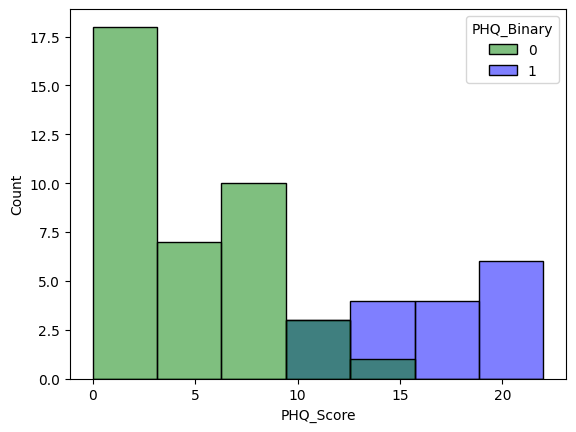

In [96]:
import seaborn as sns
sns.histplot(data=info,x='PHQ_Score',hue='PHQ_Binary',palette=['green','blue'])

In [99]:
data['class_y'].value_counts()

1    530
0    126
Name: class_y, dtype: int64

<AxesSubplot: xlabel='prob_hc', ylabel='prob_dp'>

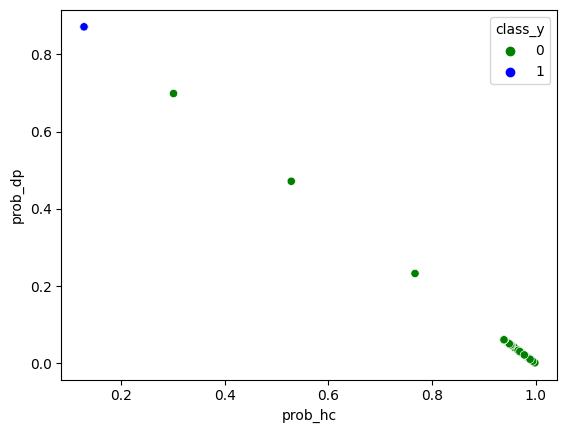

In [98]:
sns.scatterplot(x="prob_hc",
                    y="prob_dp",
                    data=data,hue='class_y',palette=['green','blue'])